In [1]:
import matplotlib.pyplot as plt
import autograd as ag
import autograd.numpy as np
import scipy.linalg as la
import scipy.signal as sp
import scipy.stats as st
import scipy.integrate as itg
%matplotlib inline

In this Project, we will use the extended Kalman filter to track the movement of a simple 
vehicle model given in discrete-time by:
\begin{equation*}
\begin{bmatrix}
p_x[k+1] \\
p_y[k+1] \\
\theta[k+1]
\end{bmatrix}
=
\begin{bmatrix}
p_x[k] \\
p_y[k] \\
\theta[k]
\end{bmatrix} + dt 
\begin{bmatrix}
u_v[k] \cos(\theta[k]) \\ 
u_v[k] \sin(\theta[k]) \\
u_\omega[k]
\end{bmatrix}
+w[k].
\end{equation*}
Here $dt$ is the time-step and $w[k]$ is the process noise. We will assume that $dt=0.1$ and the process noise is independent Gaussian noise distributed as $w[k] \sim \mathcal{N}(0,0.0001I)$.

We stack the state and inputs as:
\begin{equation*}
x[k] = \begin{bmatrix}
p_x[k] \\
p_y[k] \\
\theta[k]
\end{bmatrix}
\quad 
u[k] = \begin{bmatrix}
u_v[k] \\
u_\omega[k]
\end{bmatrix}
\end{equation*}

The initial condition, control input, $u[0],\ldots,u[100]$, and noise terms $w[0],\ldots,w[100]$ are given below. 


In [2]:
#Assume initial is 
x0=np.array([-1.42272315,1.66878427,-7.02389097])
#Assume a driver does 5 moves 
n_u=5
#u=(np.random.rand(n_u,2)-np.array([0,0.5]))* np.array([2,1])
u=np.array([[1.49609465,0.24219884],
 [0.92401463,0.45875257],
 [0.10876148,0.43543185],
 [1.97321445,0.46318528],
 [0.49352292,0.38270178]])
#set every move is equal to 20 unit time
num=20
U=np.repeat(u, 20, axis=0)
#add noise
total=n_u*num
Wp=0.0001 * np.random.randn(total, 3)
#print(U)

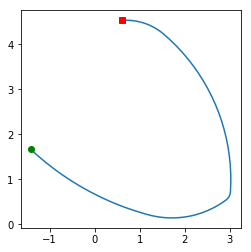

In [3]:
list=[(x0)]
temp=(x0)
for k in range(total):
    temp=temp+([0.1*U[k][0]*np.cos(temp[2]),0.1*U[k][0]*np.sin(temp[2]),0.1*U[k][1]])+(Wp[k])
    list.append(temp)
X=np.array(list)
plt.plot(X[:,0],X[:,1])
plt.plot(X[0,0],X[0,1],'go')
plt.plot(X[-1,0],X[-1,1],'rs')
plt.gca().set_aspect('equal')

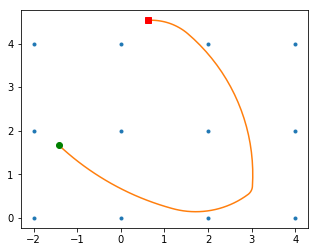

In [4]:
Sen_num=len(range(-2, 5, 2))*len((0, 5, 2))
SensorLocs =np.zeros(shape=(Sen_num,2))
i=0
for xx in range(-2, 5, 2):
    for yy in range(0, 5, 2) :
        SensorLocs[i,0]=xx
        SensorLocs[i,1]=yy
        i=i+1
        
#print(SensorLocs)
#print(a)
# Each row of SensorStr is the x-y coordinate of a sensor
plt.plot(SensorLocs[:,0],SensorLocs[:,1],'.')
plt.plot(X[:,0],X[:,1])
plt.plot(X[0,0],X[0,1],'go')
plt.plot(X[-1,0],X[-1,1],'rs')
plt.gca().set_aspect('equal')

In [ ]:
dfdx = ag.jacobian(step,0)
dfdw = ag.jacobian(step,2)

def dot(*mats):
    if len(mats) == 1:
        return mats[0]
    else:
        return np.dot(mats[0],dot(*mats[1:]))

def carTimeUpdate(x,P,u):
    w =np.zeros(3)

    x_next = step(x,u,w)
    
    F = dfdx(x,u,w)
    L = dfdw(x,u,w)

    Q = 0.0001 * np.eye(3)
    P_next = dot(F,P,F.T) + dot(L,Q,L.T)

    return x_next,P_next